In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Pickle Files

In [0]:
X_train = pd.read_pickle('drive/My Drive/Assignment-3/trainX.pickle')
X_test = pd.read_pickle('drive/My Drive/Assignment-3/testX.pickle')
y_train = pd.read_pickle('drive/My Drive/Assignment-3/trainY.pickle')

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train[1,:,:].shape

(28, 28)

# Displaying first 10 images in the training set

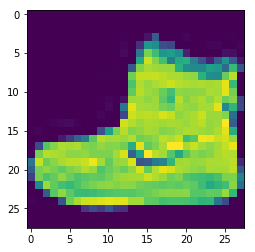

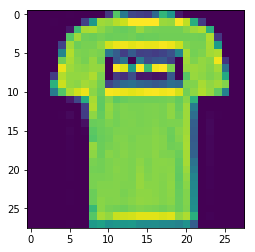

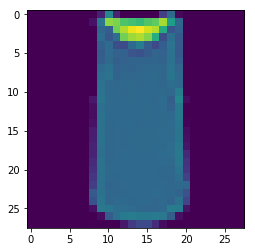

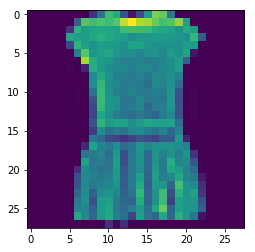

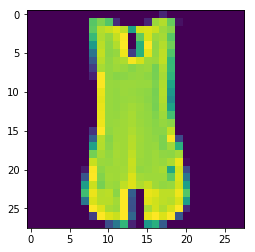

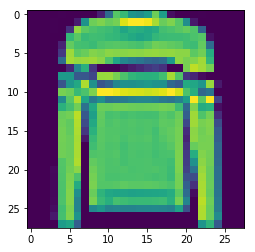

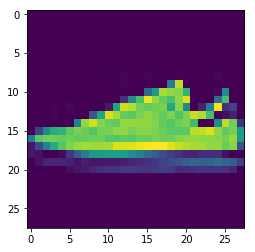

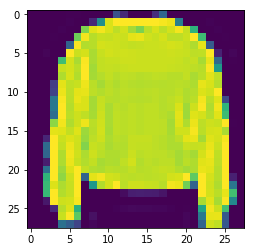

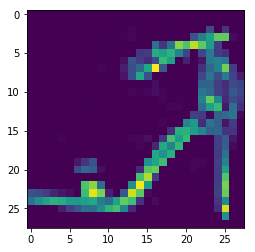

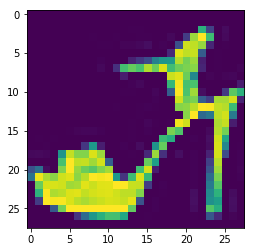

In [28]:
for i in range(10):
    plt.imshow(X_train[i, :, :])
    plt.show()

In [29]:
y_train.shape

(60000,)

In [30]:
max(y_train)

9

In [31]:
min(y_train)

0

# The images in X_train belongs to 10 classes specified in Y_train by a number between 0 to 9

# Reshaping X data for CNN Model

In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [33]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# As we have to classify images, we should use Convolution Neural Networks

# Splitting the data into training and validation data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1)

In [35]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(45000, 28, 28, 1)
(15000, 28, 28, 1)
(45000,)


# Creating a CNN Model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation, MaxPooling2D, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [37]:
cnn = Sequential() # model has layers in sequence

# convolutional layer
cnn.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu')) # convoluting
cnn.add(MaxPooling2D(pool_size=(3,3))) # pooling
cnn.add(Dropout(0.15)) # to prevent overfitting

cnn.add(Conv2D(64, (2, 2), activation='relu')) # convoluting
cnn.add(MaxPooling2D(pool_size=(2,2))) # pooling

cnn.add(Flatten()) # flattening into 1D set.
cnn.add(Dropout(0.15))

cnn.add(Dense(units=10, activation='softmax')) # Output layer
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 576)               0         
__________

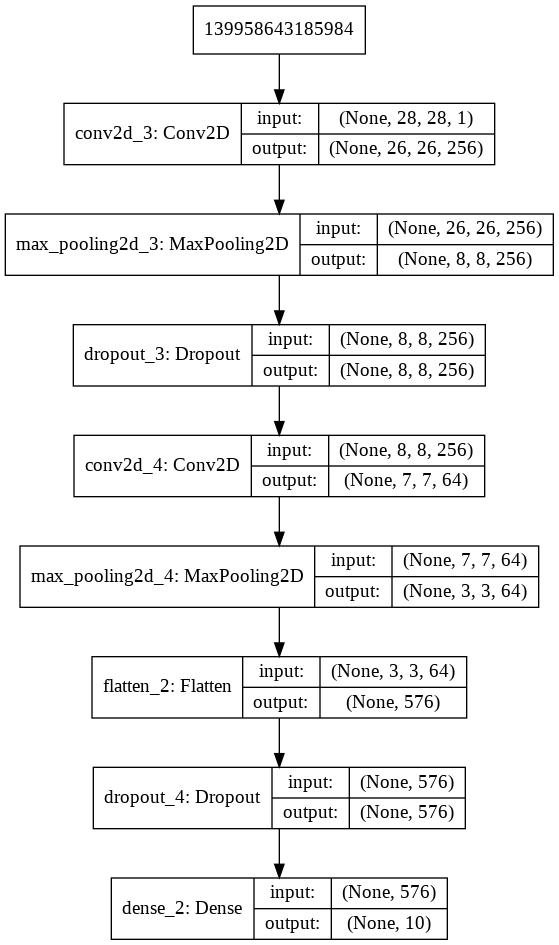

In [38]:
from keras.utils import plot_model
plot_model(cnn, show_shapes=True, show_layer_names=True, to_file='drive/My Drive/Assignment-3/model.png')
from IPython.display import Image
Image(retina=True, filename='drive/My Drive/Assignment-3/model.png')

In [39]:
cnn.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(X_train, y_train, batch_size=512, epochs=50,verbose=1, validation_data=(X_val, y_val))

W0623 16:27:02.649659 139960105174912 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 11s 242us/step - loss: 3.5033 - acc: 0.5542 - val_loss: 0.6586 - val_acc: 0.7657
Epoch 2/50
45000/45000 [==============================] - 4s 78us/step - loss: 0.6743 - acc: 0.7614 - val_loss: 0.5378 - val_acc: 0.8047
Epoch 3/50
45000/45000 [==============================] - 4s 78us/step - loss: 0.5743 - acc: 0.7932 - val_loss: 0.4903 - val_acc: 0.8191
Epoch 4/50
45000/45000 [==============================] - 4s 78us/step - loss: 0.5129 - acc: 0.8145 - val_loss: 0.4512 - val_acc: 0.8355
Epoch 5/50
45000/45000 [==============================] - 4s 79us/step - loss: 0.4748 - acc: 0.8270 - val_loss: 0.4229 - val_acc: 0.8434
Epoch 6/50
45000/45000 [==============================] - 4s 78us/step - loss: 0.4482 - acc: 0.8388 - val_loss: 0.3972 - val_acc: 0.8566
Epoch 7/50
45000/45000 [==============================] - 4s 79us/step - loss: 0.4322 - acc: 0.8427 - val_loss: 0.3855 - val_a

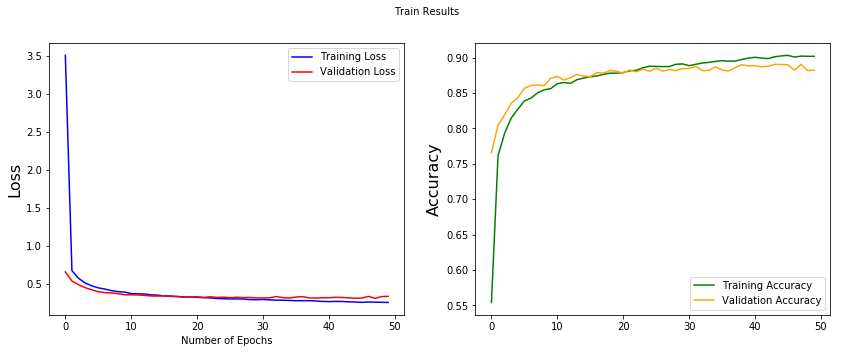

In [40]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], color='green', label='Training Accuracy')
plt.plot(history.history['val_acc'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [0]:
y_pred = cnn.predict_classes(X_test)

In [44]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
pd.DataFrame(y_pred).to_pickle("drive/My Drive/Assignment-3/predictions.pickle")

In [0]:
cnn.save("drive/My Drive/Assignment-3/myModel.h5")